In [95]:
import requests
import json
import random
from bs4 import BeautifulSoup
from tabulate import tabulate
from datetime import datetime
from collections import OrderedDict
from lxml.html import fromstring

In [74]:
headersList = [
    #Random one
    #{
    #    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:70.0) Gecko/20100101 Firefox/70.0',
    #    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    #    'Accept-Language': 'en-US,en;q=0.5',
    #    'Accept-Encoding': 'gzip, deflate, br',
    #    'Connection': 'keep-alive',
    #    'Upgrade-Insecure-Requests': '1',
    #    'TE': 'Trailers'
    #},
    #Alex's Chrome
    {
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,/;q=0.8,application/signed-exchange;v=b3;q=0.9",
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "en-US,en;q=0.9",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "cross-site",
        "Sec-Fetch-User": "?1",
        "Upgrade-Insecure-Requests": "1",
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"
    },
    #Alex's Phone
    {
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,/;q=0.8", 
        "Accept-Encoding": "gzip, deflate, br", 
        "Accept-Language": "en-us", 
        "User-Agent": "Mozilla/5.0 (iPhone; CPU iPhone OS 13_7 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.2 Mobile/15E148 Safari/604.1"
      },
    #Alex's Safari
    {
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,/;q=0.8", 
        "Accept-Encoding": "br, gzip, deflate", 
        "Accept-Language": "en-us", 
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.2 Safari/605.1.15"
      },
    #My Chrome
    {
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", 
        "Accept-Encoding": "gzip, deflate, br", 
        "Accept-Language": "en-US,en;q=0.9,de-DE;q=0.8,de;q=0.7,pt-BR;q=0.6,pt;q=0.5", 
        "Referer": "https://www.google.com/", 
        "Sec-Ch-Ua": "\"Google Chrome\";v=\"87\", \" Not;A Brand\";v=\"99\", \"Chromium\";v=\"87\"", 
        "Sec-Ch-Ua-Mobile": "?0", 
        "Sec-Fetch-Dest": "document", 
        "Sec-Fetch-Mode": "navigate", 
        "Sec-Fetch-Site": "cross-site", 
        "Sec-Fetch-User": "?1", 
        "Upgrade-Insecure-Requests": "1", 
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"
      },
    #My anonymous Chrome
    {
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", 
        "Accept-Encoding": "gzip, deflate, br", 
        "Accept-Language": "en-US,en;q=0.9", 
        "Host": "httpbin.org", 
        "Sec-Ch-Ua": "\"Google Chrome\";v=\"87\", \" Not;A Brand\";v=\"99\", \"Chromium\";v=\"87\"", 
        "Sec-Ch-Ua-Mobile": "?0", 
        "Sec-Fetch-Dest": "document", 
        "Sec-Fetch-Mode": "navigate", 
        "Sec-Fetch-Site": "none", 
        "Upgrade-Insecure-Requests": "1", 
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36", 
        "X-Amzn-Trace-Id": "Root=1-5fe26ad5-660022611a70dcf762578211"
      },
    #My edge
    {
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", 
        "Accept-Encoding": "gzip, deflate, br", 
        "Accept-Language": "en-GB,en;q=0.9,en-US;q=0.8", 
        "Host": "httpbin.org", 
        "Sec-Fetch-Dest": "document", 
        "Sec-Fetch-Mode": "navigate", 
        "Sec-Fetch-Site": "none", 
        "Upgrade-Insecure-Requests": "1", 
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 Edg/87.0.664.66", 
        "X-Amzn-Trace-Id": "Root=1-5fe26b45-5c5f8d2107a4b30d3eab7db9"
      },
    #My phone
    {
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,/;q=0.8,application/signed-exchange;v=b3;q=0.9", 
        "Accept-Encoding": "gzip, deflate, br", 
        "Accept-Language": "en-US,en;q=0.9,de-DE;q=0.8,de;q=0.7,pt-BR;q=0.6,pt;q=0.5", 
        "Sec-Ch-Ua": "\"Google Chrome\";v=\"87\", \" Not;A Brand\";v=\"99\", \"Chromium\";v=\"87\"", 
        "Sec-Ch-Ua-Mobile": "?1", 
        "Sec-Fetch-Dest": "document", 
        "Sec-Fetch-Mode": "navigate", 
        "Sec-Fetch-Site": "none", 
        "Upgrade-Insecure-Requests": "1", 
        "User-Agent": "Mozilla/5.0 (Linux; Android 10; H8216) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.101 Mobile Safari/537.36"
      }
]

#proxies = [
#    {"http" : "178.27.171.119:80",
#    "https" : "178.27.171.119:80"},
#    {"http" : "192.140.42.81:47277",
#    "https" : "192.140.42.81:47277"},
#    {"http" : "68.183.221.156:42430",
#    "https" : "68.183.221.156:42430"}
#]
    
urlNames = [
    'http://www.amazon.de/-/en/dp/B08H93ZRK9/?th=1', 
    'https://www.amazon.co.uk/-/dp/B08H95Y452/?th=1',
    'https://www.amazon.fr/dp/B08H93ZRK9/?th=1'
]

storeNames = {
    'http://www.amazon.de/-/en/dp/B08H93ZRK9/?th=1' : 'AmazonDE',
    'https://www.amazon.co.uk/-/dp/B08H95Y452/?th=1': 'AmazonUK',
    'https://www.amazon.fr/dp/B08H93ZRK9/?th=1' : 'AmazonFR'
}

prodNames = [
    'Sony PlayStation 5', 
    'PlayStation 5 Console', 
    'Sony PlayStation 5 dition Standard, Avec 1 Manette Sans Fil DualSense, Couleur: Blanche'
]

availabilityNames = [
    'Currently unavailable.',
    'Currently unavailable.',
    'Actuellement indisponible.'
]

outputTableHeaders = [
    'Store Name',
    'Product name',
    'Availability',
    'Last time code ran',
    'URL'
]

In [75]:
# Create ordered dict from Headers above
ordered_headers_list = []
for headers in headersList:
    h = OrderedDict()
    for header,value in headers.items():
        h[header]=value
    ordered_headers_list.append(h)

In [76]:
#def get_proxies():
#    proxyURL = 'https://free-proxy-list.net/'
#    URLresponse = requests.get(proxyURL)
#    URLparser = fromstring(URLresponse.text)
#    proxies = set()
#    for i in parser.xpath('//tbody/tr')[:10]:
#        if i.xpath('.//td[7][contains(text(),"yes")]'):
#            #Grabbing IP and corresponding PORT
#            proxy = ":".join([i.xpath('.//td[1]/text()')[0], i.xpath('.//td[2]/text()')[0]])
#            proxies.add(proxy)
#    return proxies

In [77]:
#Function for checking the website
def websitecheck(sourceURL):
    #Direct to the proper website, unpack and parse the URL, find the main block we're interested in
    amazonPage = requests.get(sourceURL, headers=headersPick)
    amazonSoup = BeautifulSoup(amazonPage.content, 'html.parser')
    amazonResult = amazonSoup.find(id='centerCol')

    #Extract the information we're interested in: name of the product (to double-check) and availability
    prod_elem = amazonResult.find('h1', class_='a-size-large a-spacing-none').text.strip().encode("ascii", "ignore")
    availability_elem = amazonResult.find('span', class_='a-size-medium a-color-price').text.strip()
    outputResults = [
        storeNames[sourceURL], 
        prod_elem.decode(), 
        availability_elem, 
        datetime.now().strftime("%d/%m/%Y %H:%M:%S"),
        sourceURL
    ]
    outputTable.append(outputResults)
    
    #If product is expected and availability is different than "out of stock", push notification
    if (prod_elem in prodNames) and (availability_elem not in availabilityNames):
        message_title = 'PS5 in '+ storeNames[sourceURL]+'!'
        pushbullet_message(message_title, sourceURL)

In [78]:
#Running the whole thing
while datetime.now() <= datetime(2021,2,1,0,0,0):
    outputTable = []
    for URL in urlNames:
        try:
            #Pick a random browser headers
            headersPick = dict(random.choice(ordered_headers_list))
            websitecheck(URL)
        except Exception as e:
            print('Error running check for ' + storeNames[URL] + ':' + str(e))
            print(headersPick)
            print()

    print(tabulate(outputTable, outputTableHeaders, tablefmt="html"))
    time.sleep(random.randint(40,80))

Error running check for AmazonDE:'NoneType' object has no attribute 'find'
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'en-US,en;q=0.9', 'Host': 'httpbin.org', 'Sec-Ch-Ua': '"Google Chrome";v="87", " Not;A Brand";v="99", "Chromium";v="87"', 'Sec-Ch-Ua-Mobile': '?0', 'Sec-Fetch-Dest': 'document', 'Sec-Fetch-Mode': 'navigate', 'Sec-Fetch-Site': 'none', 'Upgrade-Insecure-Requests': '1', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36', 'X-Amzn-Trace-Id': 'Root=1-5fe26ad5-660022611a70dcf762578211'}

Error running check for AmazonUK:'NoneType' object has no attribute 'find'
{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Accept-Encoding': 'gzip, d

KeyboardInterrupt: 

In [51]:
proxyURL = 'https://free-proxy-list.net/'
URLresponse = requests.get(proxyURL)
URLparser = fromstring(URLresponse.text)
proxies = set()
for i in URLparser.xpath('//tbody/tr')[:10]:
    if i.xpath('.//td[7][contains(text(),"yes")]'):
        #Grabbing IP and corresponding PORT
        proxy = ":".join([i.xpath('.//td[1]/text()')[0], i.xpath('.//td[2]/text()')[0]])
        proxies.add(proxy)
proxies

{'103.113.197.11:8080',
 '103.241.227.107:6666',
 '182.53.197.156:43060',
 '185.67.95.179:3128',
 '202.40.188.94:40486',
 '51.75.147.41:3128',
 '62.171.172.223:8118'}

<html class="a-no-js a-touch a-mobile" data-19ax5a9jf="mongoose" lang="en-gb"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta content="width=device-width, maximum-scale=1, minimum-scale=1, initial-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){i
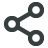
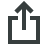
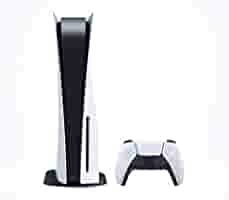

In [94]:
#amazonPage = requests.get('http://www.amazon.de/-/en/dp/B08H93ZRK9/?th=1', headers=headersPick)
#amazonSoup = BeautifulSoup(amazonPage.content, 'html.parser')
#amazonResult = amazonSoup.find(id='centerCol')
amazonSoup.html